### 머신러닝 수행 순서
* 데이터 불러오기(파일,db)
* 머신러닝에 적합한 형태로 전처리
* 데이터셋 분리(학습용, 검증용)
* 라이브러리 임포트(모델)
* 모델 객체 생성
* 학습
* 예측
* 평가

### scikit-learn (사이킷런)
* anaconda에 포함
* 모델 import
* 객체 = 모델() : 객체 생성
* 객체.fit() : 학습
* 객체.predict() : 예측

In [3]:
from sklearn import svm # import
model = svm.SVC() # 객체 생성
xor_data = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

In [4]:
# 학습
# fit(독립변수,종속변수)
model.fit([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], [0,1,1,0])

SVC()

In [5]:
# 예측
model.predict([[0,0]])

array([0])

In [6]:
# 학습데이터에서 결과값을 분리
data = []
label = []
for r in xor_data:
    data.append([r[0], r[1]])
    label.append(r[2])

In [7]:
data, label

([[0, 0], [0, 1], [1, 0], [1, 1]], [0, 1, 1, 0])

In [8]:
model.fit(data, label)

SVC()

In [9]:
pre = model.predict(data)
pre

array([0, 1, 1, 0])

In [10]:
cnt = 0
for i, a in enumerate(label):
    if a == pre[i]:
        cnt += 1
print('정답률:{}'.format(cnt/len(label)))

정답률:1.0


In [11]:
import numpy as np

In [12]:
x = np.arange(10).reshape(-1,1)
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [13]:
def f(x):
    return 2*x+1
y = f(x)
y

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19]])

In [14]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression() # 객체 생성
model.fit(x, y)

LinearRegression()

In [16]:
pre = model.predict([[10],[20]])
pre

array([[21.],
       [41.]])

### 키와, 몸무게 랜덤으로 구해서 bmi 구해 csv 저장


In [17]:
# bmi 구하는 함수
# 결과값은 0:저체중,1:표준,2:과체중
def bmi(h,w):
    v = w / (h/100)**2
    if v < 18.5:
        return 0
    elif v < 25:
        return 1
    else :
        return 2
f = open('bmi.csv','w',encoding='utf-8')
f.write('height,weight,label\n')
for i in range(1000):
    import random
    h = random.randint(120,210) # 키
    w = random.randint(30,100) # 몸무게
    label = bmi(h,w)
    f.write('{0},{1},{2}\n'.format(h,w,label))
f.close()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bmi.csv')
df.head()

,height,weight,label
0,185,40,0
1,123,92,2
2,179,50,0
3,121,100,2
4,136,65,2


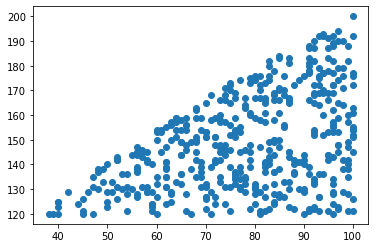

In [19]:
# 산점도
df2 = df[df.loc[:,'label']==2]
plt.scatter(df2['weight'], df2['height'])

In [20]:
df.iloc[:,:2]

,height,weight
0,185,40
1,123,92
2,179,50
3,121,100
4,136,65
...,...,...
995,132,92
996,161,85
997,200,37
998,172,51


In [21]:
# 학습데이터와 검증데이터 분리
from sklearn.model_selection import train_test_split
# train_test_split(레이블뺀데이터, 레이블)
# 리턴값 : 학습용데이터, 검증용데이터, 학습용답, 검증용답
# random_state : 시드값 (나중에도 동일한 결과가 나오게하기 위해)
# test_size : 테스트셋의 비율
data_train, data_test, label_train, label_test = train_test_split\
(df.iloc[:,:2],df['label'], random_state=10, test_size=0.2)

In [25]:
data_train.shape, data_test.shape

((800, 2), (200, 2))

In [23]:
# import
from sklearn import svm, metrics
model = svm.SVC() # 객체 생성
model.fit(data_train, label_train) # 학습
pred = model.predict(data_test)

In [24]:
# 평가
# accuracy : 정확도 (acc)
score = metrics.accuracy_score(label_test, pred)
score

0.965